# Microsoft Needs Analysis

Author: Dimitry Belozersky, Talia Reich, Kibae Kim

## Overview

In this project, we set out to discover trends in film production that lead to higher profits in order to advise a new film division of Microsoft. Through analyzing metrics such as genre, production budget, and which films are part of a larger franchise, our data suggests that large-budget franchise films in the animation, musical, adventure, and fantasy genres are most likely to be profitable. Microsoft can use these findings to allocate funds appropriately and establish themselves in the film industry. 

## Business Problem

As a newcomer in the film industry, Microsoft has a lot of potential to create the next big blockbuster. However, there are several considerations to make before deciding what kind of movie will be most successful. The first film to come out of the Microsoft studio will set the stage for their business trajectory, so it is imperative that it be a profitable endeavor.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import sqlite3
from sklearn.preprocessing import OneHotEncoder
from zipfile import ZipFile
import tarfile
import gzip
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Movie Databases

We used data from Box Office Mojo, IMDB, TheMovieDB, and The Numbers. We primarily used the Box Office Mojo database for studio information and cross-referenced with The Numbers data which had more reliable profit metrics. The IMDB data was used to identify the genre of a movie with a specific ID number that corresponds to a particular movie across all IMDB databases. 

In [2]:
with gzip.open("zippedData/bom.movie_gross.csv.gz", "rb") as f:
    bom_movie_gross = pd.read_csv(f)
    
with gzip.open("zippedData/imdb.name.basics.csv.gz", "rb") as f:
    imdb_name_basics = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.akas.csv.gz", "rb") as f:
    imdb_title_akas = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.basics.csv.gz", "rb") as f:
    imdb_title_basics = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.crew.csv.gz", "rb") as f:
    imdb_title_crew = pd.read_csv(f)
    
with gzip.open("zippedData/imdb.title.principals.csv.gz", "rb") as f:
    imdb_title_principals = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.ratings.csv.gz", "rb") as f:
    imdb_title_ratings = pd.read_csv(f)
    
with gzip.open("zippedData/tmdb.movies.csv.gz", "rb") as f:
    tmdb_movies = pd.read_csv(f)

with gzip.open("zippedData/tn.movie_budgets.csv.gz", "rb") as f:
    tn_movie_budgets = pd.read_csv(f)


In [3]:
bom_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [4]:
imdb_name_basics.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


In [5]:
imdb_title_akas.head(3)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [6]:
imdb_title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [7]:
imdb_title_crew.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [8]:
imdb_title_principals.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


In [9]:
imdb_title_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [10]:
tmdb_movies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [11]:
tn_movie_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


## Question 1. Budget and Number of Movies

Find out other movie studio's profit trend concern with budget and number of movies

## Data Preparation

### Data Cleaning

For the bom movie gross, tn movie budget and tmdb movies files, I wanted to combine these files in a dataframe, so I changed all of files' index to title and dropped unnecessary columns.

I used outer join to use as much data I can and fill missing value of 'production_budget', 'worldwide_gross' and 'year' by using other columns' data. 


In [12]:
bom_movie_gross.set_index('title', inplace=True)

tn_movie_budgets = tn_movie_budgets.rename(columns={'movie':'title'})
tn_movie_budgets.set_index('title', inplace=True)

tmdb_movies.set_index('title', inplace=True)
tmdb_movies = tmdb_movies.drop(['id', 'Unnamed: 0', 'original_language', 'original_title', 'genre_ids'], axis=1)

movie_budget = tn_movie_budgets.join(bom_movie_gross, how='outer', rsuffix='_bom')
movie_budget_pop = movie_budget.join(tmdb_movies, how='outer', rsuffix='_pop')

In [13]:
# remove dollar sign
movie_budget_pop.domestic_gross = movie_budget_pop.domestic_gross.str.replace('$','')
movie_budget_pop.production_budget = movie_budget_pop.production_budget.str.replace('$','')
movie_budget_pop.worldwide_gross = movie_budget_pop.worldwide_gross.str.replace('$','')


# remove ',' sign
movie_budget_pop['production_budget'] = movie_budget_pop['production_budget'].str.replace(',','', regex=True)
movie_budget_pop['domestic_gross'] = movie_budget_pop['domestic_gross'].str.replace(',','', regex=True)
movie_budget_pop['worldwide_gross'] = movie_budget_pop['worldwide_gross'].str.replace(',','', regex=True)
movie_budget_pop['foreign_gross'] = movie_budget_pop['foreign_gross'].str.replace(',','', regex=True)


# rename studio column values
movie_budget_pop['studio'] = movie_budget_pop['studio'].str.replace('FoxS','Fox', regex=True)
movie_budget_pop['studio'] = movie_budget_pop['studio'].str.replace("WB (NL)","WB", regex=False)


# change 'domestic_gross_bom' type to str
movie_budget_pop['domestic_gross_bom'] = movie_budget_pop['domestic_gross_bom'].astype('str')


# remove .00 from year
movie_budget_pop['year'] = movie_budget_pop['year'].astype('str')
movie_budget_pop.domestic_gross_bom = movie_budget_pop.domestic_gross_bom.str[0:-2]
movie_budget_pop.year = movie_budget_pop.year.str[0:-2]


# fill NaN values
movie_budget_pop['domestic_gross'] = movie_budget_pop['domestic_gross'].fillna(movie_budget_pop['domestic_gross_bom'])
movie_budget_pop['domestic_gross_bom'] = movie_budget_pop['domestic_gross_bom'].fillna(0)
movie_budget_pop.domestic_gross_bom[movie_budget_pop.domestic_gross_bom == "n"] = 0

movie_budget_pop.foreign_gross[movie_budget_pop.foreign_gross.str[-2] == "."] = movie_budget_pop.foreign_gross.str[0:-2]
movie_budget_pop['foreign_gross'] = movie_budget_pop['foreign_gross'].fillna(0)
movie_budget_pop['domestic_gross_bom'] = movie_budget_pop['domestic_gross_bom'].astype('int')
movie_budget_pop['foreign_gross'] = movie_budget_pop['foreign_gross'].astype('int')
movie_budget_pop['new_total'] = movie_budget_pop['domestic_gross_bom'] + movie_budget_pop['foreign_gross']

movie_budget_pop.new_total[movie_budget_pop.new_total == 0] = np.nan
movie_budget_pop['new_total'] = movie_budget_pop['new_total'].astype('str')

movie_budget_pop['worldwide_gross'] = movie_budget_pop['worldwide_gross'].fillna(movie_budget_pop['new_total'])
movie_budget_pop.worldwide_gross[movie_budget_pop.worldwide_gross.str[-2] == "."] = movie_budget_pop.worldwide_gross.str[0:-2]
movie_budget_pop.worldwide_gross[movie_budget_pop.worldwide_gross == '0'] = np.nan
movie_budget_pop.dropna(subset=['production_budget', 'worldwide_gross'], inplace=True)

movie_budget_pop.year[movie_budget_pop.year == "n"] = np.nan
movie_budget_pop['rel_year'] = movie_budget_pop['release_date'].str[-4:]
movie_budget_pop['rel_year2'] = movie_budget_pop['release_date_pop'].str[:4]

movie_budget_pop['year'] = movie_budget_pop['year'].fillna(movie_budget_pop['rel_year'])
movie_budget_pop['year'] = movie_budget_pop['year'].fillna(movie_budget_pop['rel_year2'])
movie_budget_pop['year'] = movie_budget_pop['year'].astype('int')


# drop values
movie_budget_pop = movie_budget_pop.drop(['domestic_gross_bom', 'foreign_gross', 'new_total', 'rel_year', 'release_date', 'id', 'domestic_gross', 'release_date_pop', 'rel_year2', 'popularity', 'vote_average', 'vote_count'], axis=1)
movie_budget_pop = movie_budget_pop.drop_duplicates()

In [14]:
# add 'profit_budget_ratio' columns

movie_budget_pop['worldwide_gross'] = movie_budget_pop['worldwide_gross'].astype('float')
movie_budget_pop['production_budget'] = movie_budget_pop['production_budget'].astype('int')
movie_budget_pop['profit_budget_ratio'] = movie_budget_pop['worldwide_gross'] / movie_budget_pop['production_budget']

In [15]:
movie_budget_pop = movie_budget_pop.reset_index()

In [16]:
# change studio name to full name and fill top 50 movies' nan value
movie_budget_pop.studio[movie_budget_pop.studio == 'BV'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.studio == 'Uni.'] = 'Universal Studios'
movie_budget_pop.studio[movie_budget_pop.studio == 'Par.'] = 'Paramount Pictures'
movie_budget_pop.studio[movie_budget_pop.studio == 'WB'] = 'Warner Bros'


movie_budget_pop.studio[movie_budget_pop.title == 'Star Wars Ep. VII: The Force Awakens'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'The Avengers'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Harry Potter and the Deathly Hallows: Part II'] = 'Warner Bros'
movie_budget_pop.studio[movie_budget_pop.title == 'Star Wars Ep. VIII: The Last Jedi'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Beauty and the Beast'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Captain Marvel'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Alice in Wonderland'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'The Jungle Book'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Harry Potter and the Deathly Hallows: Part I'] = 'Warner Bros'
movie_budget_pop.studio[movie_budget_pop.title == 'Guardians of the Galaxy Vol 2'] = 'Disney'
movie_budget_pop.studio[movie_budget_pop.title == 'Venom'] = 'Sony'
movie_budget_pop.studio[movie_budget_pop.title == 'The Twilight Saga: Breaking Dawn, Part 2'] = 'Lionsgate'


movie_budget_pop.set_index('title', inplace=True)


In [17]:
movie_budget_pop.head()

,production_budget,worldwide_gross,studio,year,profit_budget_ratio
title,,,,,
(500) Days of Summer,7500000,34439060.0,NaN,2009,4.591875
10 Cloverfield Lane,5000000,108286422.0,Paramount Pictures,2016,21.657284
10 Days in a Madhouse,12000000,14616.0,NaN,2015,0.001218
10 Things I Hate About You,13000000,60413950.0,NaN,1999,4.647227
"10,000 B.C.",105000000,269065678.0,NaN,2008,2.562530


In [18]:
# find average movie budget, profit
average_set = movie_budget_pop.groupby(['year'], sort=True)['production_budget', 'worldwide_gross'].mean()
average_set.head()

,production_budget,worldwide_gross
year,,
1915,110000.0,11000000.0
1916,200000.0,8000000.0
1920,100000.0,3000000.0
1925,2072500.0,15500000.0
1929,379000.0,4358000.0


In [19]:
# drop 'studio' NaN values' rows 
new_set = movie_budget_pop.dropna(subset=['studio'])
new_set = movie_budget_pop[movie_budget_pop['year'] >= 2010]
new_set = new_set[new_set['year'] < 2019]

# make year_count dataframe by using groupby
year_count = new_set.groupby(['year'], sort=True)['production_budget'].count()
year_sum = new_set.groupby(['year'], sort=True)['production_budget', 'worldwide_gross'].sum()
year_sum['number of movies'] = year_count
year_sum.head()

,production_budget,worldwide_gross,number of movies
year,,,
2010,9355365650,2.482039e+10,261
2011,8921685000,2.476813e+10,245
2012,8474829000,2.707662e+10,208
2013,8817485000,2.635116e+10,211
2014,7575910373,2.516035e+10,209


In [20]:
# make dataframe which explain studio's annual data
year_studio_sum = movie_budget_pop.groupby(['studio','year'], sort=True)['production_budget', 'worldwide_gross'].sum()
year_studio_count = movie_budget_pop.groupby(['studio','year'], sort=True)['production_budget'].count()
year_studio_sum['number of movies'] = year_studio_count

year_studio_sum = year_studio_sum.reset_index()
year_studio_sum = year_studio_sum[year_studio_sum['year'] >= 2010]
year_studio_sum = year_studio_sum[year_studio_sum['year'] < 2019]
year_studio_sum= year_studio_sum.set_index('year')

In [21]:
# find top 35 worldwide gross of year_studio_sum's studio name
top35_year_studio_sum = year_studio_sum.nlargest(35, ['worldwide_gross'])
list_top35_year_studio_sum = list(set(top35_year_studio_sum['studio']))

In [22]:
# grouping and cleaning data
movie_budget_pop_2010 = movie_budget_pop[movie_budget_pop['year'] >= 2010]
movie_budget_pop_2010 = movie_budget_pop_2010[movie_budget_pop_2010['year'] < 2019]

major_studio_data = movie_budget_pop_2010[movie_budget_pop_2010.studio.isin(list_top35_year_studio_sum)]
major_studio_data = major_studio_data.drop_duplicates()

major_year_count = major_studio_data.groupby(['year'], sort=True)['production_budget'].count()
major_year_sum = major_studio_data.groupby(['year'], sort=True)['production_budget', 'worldwide_gross'].sum()
major_year_sum['number of movies'] = major_year_count



non_major_studio_data = movie_budget_pop_2010[~movie_budget_pop_2010.studio.isin(list_top35_year_studio_sum)]
non_major_studio_data = non_major_studio_data.drop_duplicates()


non_major_year_count = non_major_studio_data.groupby(['year'], sort=True)['production_budget'].count()
non_major_year_sum = non_major_studio_data.groupby(['year'], sort=True)['production_budget', 'worldwide_gross'].sum()
non_major_year_sum['number of movies'] = non_major_year_count

studio_data = major_year_sum.join(non_major_year_sum, how='outer', lsuffix='_major', rsuffix='_non_major')
studio_data = studio_data.dropna()

studio_data.head()

,production_budget_major,worldwide_gross_major,number of movies_major,production_budget_non_major,worldwide_gross_non_major,number of movies_non_major
year,,,,,,
2010,5069470000,1.503071e+10,79,4285895650,9.789678e+09,182
2011,5405375000,1.600862e+10,86,3516310000,8.759514e+09,159
2012,5097935000,1.678920e+10,72,3376894000,1.028742e+10,136
2013,5576500000,1.794241e+10,69,3240985000,8.408743e+09,142
2014,4595300000,1.727388e+10,66,2980610373,7.886472e+09,143


In [23]:
# find average budget and worldwide gross per movie 
average_set_2010_2018 = average_set.tail(10)
average_set_2010_2018 = average_set_2010_2018.reset_index()
average_set_2010_2018 = average_set_2010_2018[average_set_2010_2018['year'] < 2019]
average_set_2010_2018 = average_set_2010_2018.set_index('year')

average_set_2010_2018

,production_budget,worldwide_gross
year,,
2010,3.584431e+07,9.509727e+07
2011,3.641504e+07,1.010944e+08
2012,4.074437e+07,1.301761e+08
2013,4.178903e+07,1.248870e+08
2014,3.624837e+07,1.203845e+08
2015,3.570830e+07,1.161149e+08
2016,4.400230e+07,1.407414e+08
2017,5.009202e+07,1.720271e+08
2018,4.855109e+07,1.883816e+08


## Analysis

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from collections import OrderedDict
from operator import itemgetter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x * 1e-9)

### Relationship Between Production Budget and Worldwide Gross

The relationship between production budget and worldwide gross profit has positive relationship.

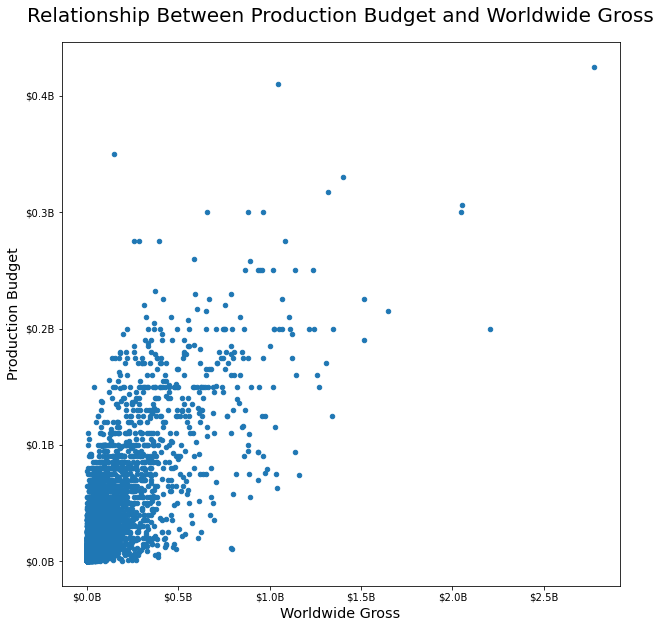

In [25]:
ax = movie_budget_pop.plot.scatter('worldwide_gross', 'production_budget', figsize=(10,10))

ax.set_title('Relationship Between Production Budget and Worldwide Gross',pad=20, fontsize=20)
ax.set_xlabel('Worldwide Gross', fontsize='x-large')
ax.set_ylabel('Production Budget', fontsize='x-large')
formatter = FuncFormatter(billions)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

### Annual Average Production Budget and Worldwide Gross

Budget has grown over the time, and worldwide gross profit has increased steeper.

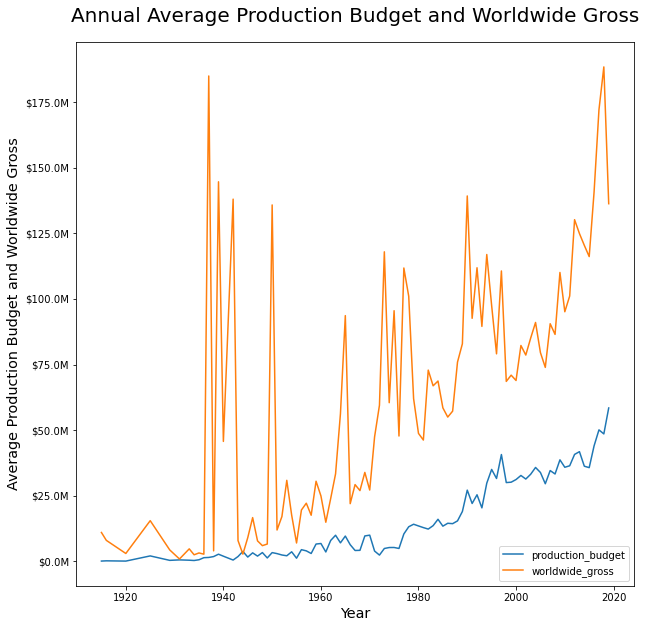

In [26]:
ax = average_set.plot(figsize=(10,10))


ax.set_title('Annual Average Production Budget and Worldwide Gross',pad=20, fontsize=20)
ax.set_xlabel('Year', fontsize='x-large')
ax.set_ylabel('Average Production Budget and Worldwide Gross', fontsize='x-large')
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter);

### Annual Total Production Budget, Worldwide Gross Total Number of Movies

Worldwide gross profit has increased and budget is almost same but number of movies decreased.

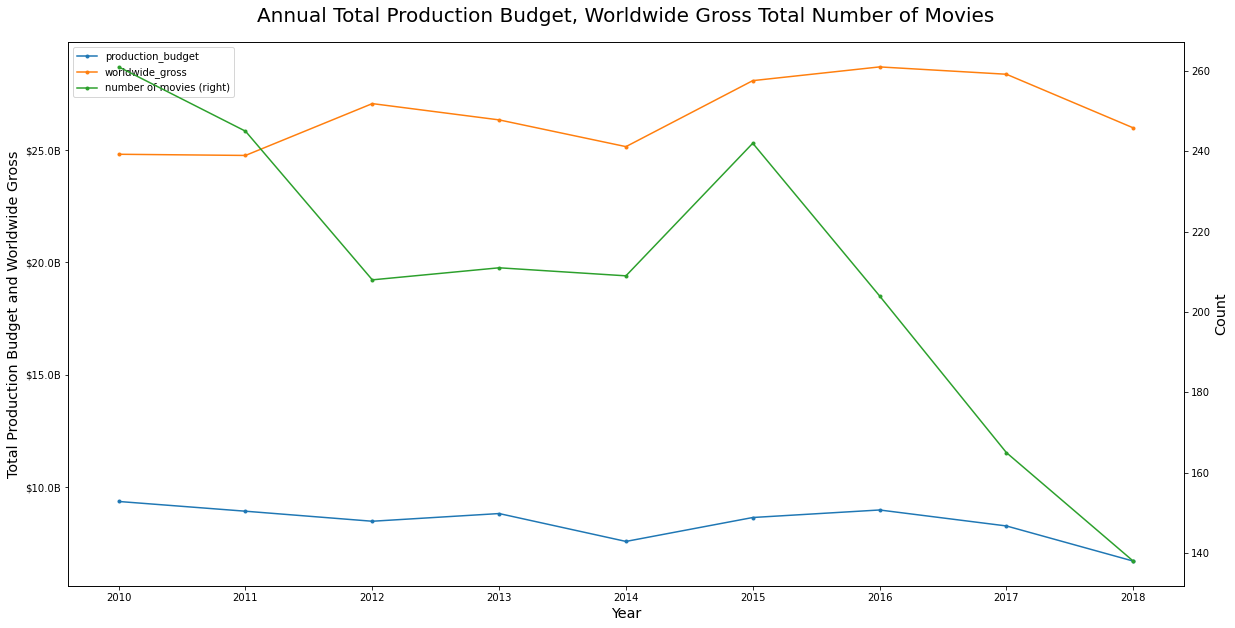

In [27]:
ax = year_sum.plot(figsize=(20,10), secondary_y=['number of movies'], marker='.')


ax.set_title("Annual Total Production Budget, Worldwide Gross Total Number of Movies", pad=20, fontsize=20)
ax.set_xlabel('Year', fontsize='x-large')
ax.set_ylabel('Total Production Budget and Worldwide Gross', fontsize='x-large')
ax.right_ax.set_ylabel('Count', fontsize='x-large')
formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter);

### Annual Average Production Budget and Worldwide Gross from 2010 to 2018

For 8 years, CAGR of budget is 3.87%, CAGR of worldwide gross is 8.92%.

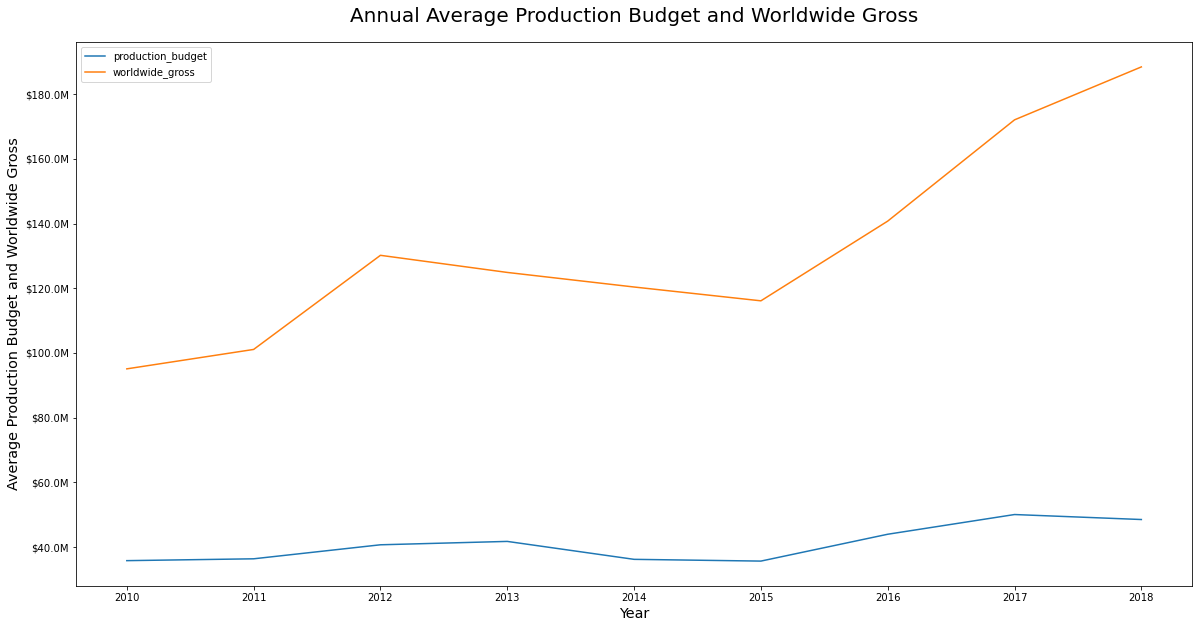

In [28]:
ax = average_set_2010_2018.plot(figsize=(20,10))


ax.set_title('Annual Average Production Budget and Worldwide Gross',pad=20, fontsize=20)
ax.set_xlabel('Year', fontsize='x-large')
ax.set_ylabel('Average Production Budget and Worldwide Gross', fontsize='x-large')
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter);

In [29]:
# calculate YOY of budget and worldwide gross
budget2010 = float(average_set_2010_2018.iloc[0]['production_budget'])
budget2018 = float(average_set_2010_2018.iloc[-1]['production_budget'])


gross2010 = float(average_set_2010_2018.iloc[0]['worldwide_gross'])
gross2018 = float(average_set_2010_2018.iloc[-1]['worldwide_gross'])


num_year = len(average_set_2010_2018) - 1

budget_CAGR = round(((budget2018 / budget2010)**(1 / num_year) - 1)*100, 2)
gross_CAGR = round(((gross2018 / gross2010)**(1 / num_year) - 1)*100, 2)

print(f"For {num_year} years, CAGR of budget is {budget_CAGR}%, CAGR of worldwide gross is {gross_CAGR}%.")

For 8 years, CAGR of budget is 3.87%, CAGR of worldwide gross is 8.92%.


### 6 Major Studio List

In [30]:
print(list_top35_year_studio_sum)

['Sony', 'Universal Studios', 'Warner Bros', 'Fox', 'Disney', 'Paramount Pictures']


### Compare Major and Non-major Studio's Data

Both major and non-major studio made less movies but put more budget on each movies, as a result major studio creates better profit.

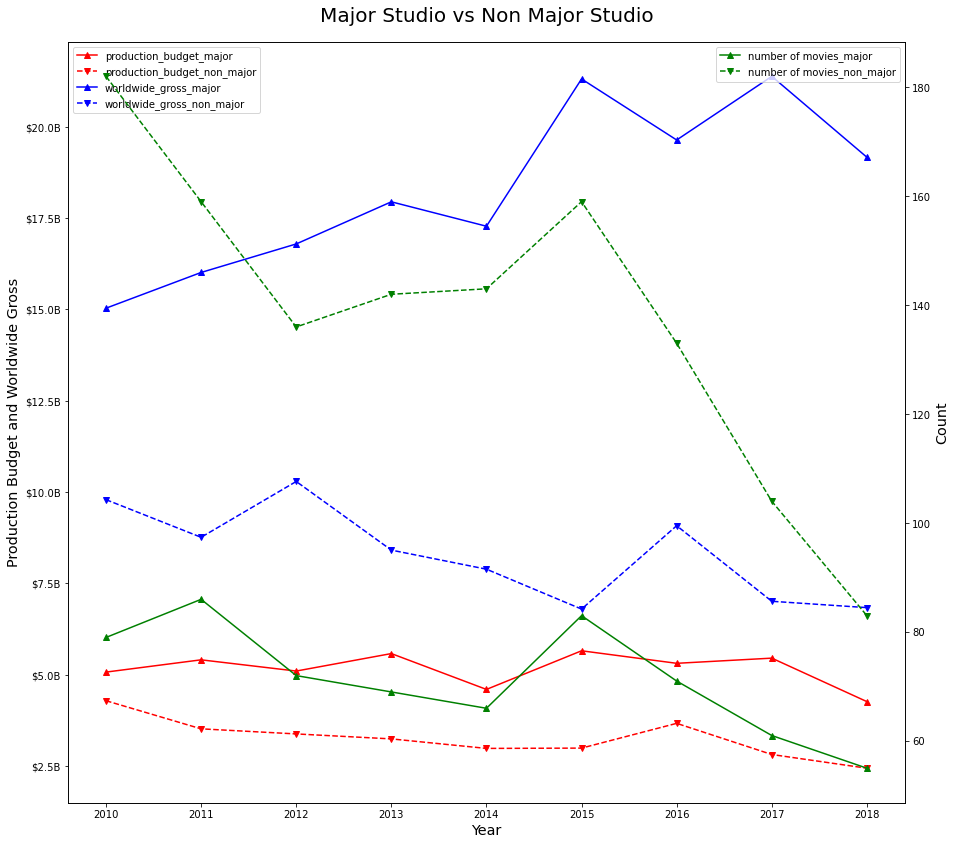

In [31]:
fig, ax = plt.subplots(figsize=(15,14))

ax.plot(studio_data.index, studio_data['production_budget_major'], 'r', marker="^", label = 'production_budget_major')
ax.plot(studio_data.index, studio_data['production_budget_non_major'], 'r--', marker="v", label = 'production_budget_non_major')
plt.legend()


ax.plot(studio_data.index, studio_data['worldwide_gross_major'], 'b', marker="^", label = 'worldwide_gross_major')
ax.plot(studio_data.index, studio_data['worldwide_gross_non_major'], 'b--', marker="v", label = 'worldwide_gross_non_major')
ax.set_xlabel('Year', fontsize='x-large')
ax.set_ylabel('Production Budget and Worldwide Gross', fontsize='x-large')
formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)
plt.legend()


ax2 = ax.twinx()
ax2.plot(studio_data.index, studio_data['number of movies_major'], 'g', marker="^", label = 'number of movies_major')
ax2.plot(studio_data.index, studio_data['number of movies_non_major'], 'g--', marker="v", label = 'number of movies_non_major')
ax2.set_ylabel('Count', fontsize='x-large')

plt.title('Major Studio vs Non Major Studio', pad=20, fontsize=20)


plt.legend()
plt.show()

### Major Studio's Average Data and Microsoft's Expected Profit Return

Major studio's made mostly made 12 movies per year and average production budget was 0.8 Billion dollar per movie. It creates 8.6 billion dollar per movies. So, we can expect that Microsoft movie studio's expected average return rate of return is 254.42%.

In [32]:
sum_major_studio = year_studio_sum[year_studio_sum['studio'].isin(list_top35_year_studio_sum)].mean().astype(float)
sum_major_studio

production_budget    8.596330e+08
worldwide_gross      3.046740e+09
number of movies     1.188889e+01
dtype: float64

In [33]:
profit_percentage = round(((sum_major_studio['worldwide_gross'] - sum_major_studio['production_budget'])/sum_major_studio['production_budget']*100),2)
print(f"Microsoft movie studio's expected average return rate of return is {profit_percentage}%")

Microsoft movie studio's expected average return rate of return is 254.42%


## Question 2. Do Sequels Make More Money?

I looked at the top 20 most profitable movies in The Numbers database to determine if there are any trends.

## Data Preparation

### Data Cleaning

Cleaned the tn_movie_budgets and sorted into a list of the top 20 profitable movies.

In [34]:
with gzip.open("zippedData/tn.movie_budgets.csv.gz", "rb") as f:
    tn_movie_budgets = pd.read_csv(f)

    
#Rename dataframe & remove dollar sign and commas from each column
df = tn_movie_budgets
df['production_budget'] = df['production_budget'].str.replace(',','')
df['production_budget'] = df['production_budget'].str.replace('$','')
df['domestic_gross'] = df['domestic_gross'].str.replace(',','')
df['domestic_gross'] = df['domestic_gross'].str.replace('$','')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',','')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$','')


#Reformat monetary amount from object to integer
df['production_budget'] = df['production_budget'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(float)


#Make new column 'profit' and new list of movies with the 20 highest profits
df['profit'] = df['worldwide_gross']-df['production_budget']
df_prof_sorted = df.sort_values('profit', ascending = False)
df_top_20_prof = df_prof_sorted[0:20]
list_top_20 = list(df_top_20_prof['movie'])
list_top_20

['Avatar',
 'Titanic',
 'Avengers: Infinity War',
 'Star Wars Ep. VII: The Force Awakens',
 'Jurassic World',
 'Furious 7',
 'The Avengers',
 'Harry Potter and the Deathly Hallows: Part II',
 'Black Panther',
 'Jurassic World: Fallen Kingdom',
 'Frozen',
 'Beauty and the Beast',
 'Minions',
 'Avengers: Age of Ultron',
 'The Lord of the Rings: The Return of the King',
 'Incredibles 2',
 'Iron Man 3',
 'Star Wars Ep. VIII: The Last Jedi',
 'Aquaman',
 'The Fate of the Furious']

In [35]:
#Manually sort from the top 20 list into 4 categories
franchise_sequel = ['Avengers: Infinity War', 'Star Wars Ep. VII: The Force Awakens', 'Jurassic World', 'Furious 7', 'Harry Potter and the Deathly Hallows: Part II','Jurassic World: Fallen Kingdom', 'Minions','Avengers: Age of Ultron','The Lord of the Rings: The Return of the King','Incredibles 2','Iron Man 3','Star Wars Ep. VIII: The Last Jedi','The Fate of the Furious']
franchise_original = ['Avatar', 'The Avengers', 'Black Panther', 'Frozen', 'Aquaman']
remake = ['Beauty and the Beast']
stand_alone = ['Titanic']

## Analysis

### Category of Top 20 Movies by Profit

Grouped the top 20 movies into four categories: Franchise Sequel, Franchise Original, Remake, and Stand-alone and graphed each frequency. Clearly, franchises are heavily represented.

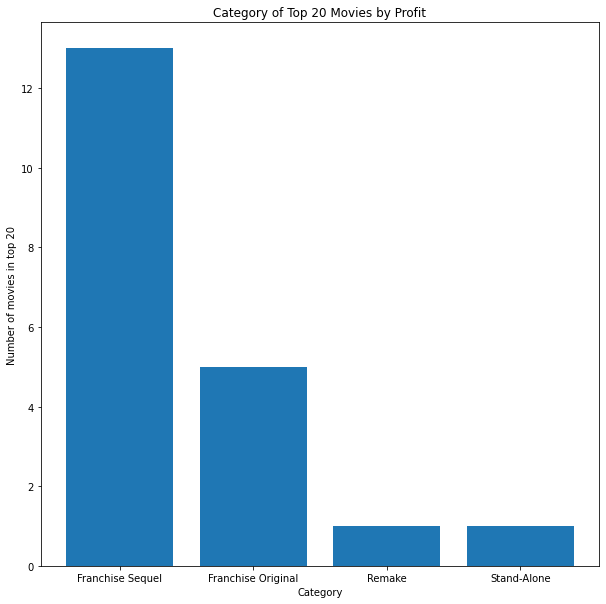

In [36]:
#Plot how many of the top 20 profiting movies are in each category
fig, ax = plt.subplots(figsize = (10,10))

x = ['Franchise Sequel', 'Franchise Original', 'Remake', 'Stand-Alone']
y = [len(franchise_sequel), len(franchise_original), len(remake), len(stand_alone)]
ax.bar(x,y)
ax.set_title('Category of Top 20 Movies by Profit')
ax.set_ylabel('Number of movies in top 20')
ax.set_xlabel('Category');

## Question 3. What Are The Most Profitable Genres?

We wanted to see if we can recomend a particular genre or genres for Microsoft Films to make.

## Data Preparation

### Data Cleaning

We started by joining the movie budgets database with two imdb databases to have a list of movies, their generes, and their total worldwide gross.

Then we isolated the individual genres into their own list and used it to iterate over the database and create 3 dictionaries - for total gross, total profit, and total count of movies per genre.

In [37]:
with gzip.open("zippedData/tn.movie_budgets.csv.gz", "rb") as f:
    tn_movie_budgets = pd.read_csv(f)
    

# Select only movies from US region and change column 'title' to 'movie'
x_df = imdb_title_akas.loc[imdb_title_akas['region'] == 'US']
x_df = x_df.rename(columns={'title': 'movie'})
x_df.head(1)

,title_id,ordering,movie,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0


In [38]:
gross_df = pd.merge(tn_movie_budgets, x_df, how='left', on='movie')
gross_df.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_id,ordering,region,language,types,attributes,is_original_title
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Clean and turn 'worldwide_gross' into float for accurate sorting
gross_df['worldwide_gross'] = gross_df['worldwide_gross'].str.replace(',', '')
gross_df['worldwide_gross'] = gross_df['worldwide_gross'].str.replace('$', '')
gross_df['worldwide_gross'] = gross_df['worldwide_gross'].astype(float)
gross_df1 = gross_df.sort_values('worldwide_gross', ascending=False)


# Clean and turn 'production_budget' into float for accurate sorting
gross_df['production_budget'] = gross_df['production_budget'].str.replace(',', '')
gross_df['production_budget'] = gross_df['production_budget'].str.replace('$', '')
gross_df1['production_budget'] = gross_df['production_budget'].astype(float)


# Clean unused columns
movie_df = gross_df1.drop(['id', 'ordering', 'region', 'language', 
                           'types', 'attributes', 'is_original_title'], axis=1)



# Drop all duplicate film entries
movie_df = movie_df.drop_duplicates()


movie_df.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_id
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,NaN


In [40]:
# Change 'primary_title' to 'movie'
imdb_title_basics = imdb_title_basics.rename(columns={'primary_title': 'movie'})


# Merge movie_df and imdb_title_basics on 'movie'
genere_df = pd.merge(movie_df, imdb_title_basics, how='left', on='movie')


# Drop NaNs from 'genres'
genere_df = genere_df.dropna(subset=['genres'])


# Create a new column to reflect total profit
genere_df['profit'] = genere_df['worldwide_gross'] - genere_df['production_budget']


genere_df.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_id,tconst,original_title,start_year,runtime_minutes,genres,profit
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,NaN,tt1775309,Abatâ,2011.0,93.0,Horror,2.351345e+09


In [41]:
# Create list of items in 'generes' column
list_of_genres = []
for key, value in genere_df['genres'].items():
    list_of_genres.append(value)
    

list_of_genres[0:5]

['Horror',
 'Adventure',
 'Family',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi']

In [42]:
# Split list of genre columns
list_of_genres_full = []
for x in list_of_genres:
    list_of_genres_full.append(str(x).split(','))
    
# Create list of individual genres
genre_list = []
for element in list_of_genres_full:
    for item in element:
        if item not in genre_list:
            genre_list.append(item)
            


# Create genre dictionary for gross with key 0
genre_dict_gross = { i : 0 for i in genre_list }



# Make genre dictionary key equal to total worldwide gross for each genre
for index, row in genere_df.iterrows():
    gross = row['worldwide_gross']
    list_g = row['genres'].split(',')
    for i in list_g:
        genre_dict_gross[i] += gross
        
        

# Create genre dictionary for profit with key 0
genre_dict_profit = { i : 0 for i in genre_list }


# Make genre dictionary key equal to total profit for each genre
for index, row in genere_df.iterrows():
    profit = row['profit']
    list_g = row['genres'].split(',')
    for i in list_g:
        genre_dict_profit[i] += profit
        
        
# Create genre dictionary for amount of movies with key 0
genre_dict_count = { i : 0 for i in genre_list }


# Make genre dictionary key equal to total profit for each genre
for index, row in genere_df.iterrows():
    list_g = row['genres'].split(',')
    for i in list_g:
        genre_dict_count[i] += 1
        
        
print(genre_dict_count)

{'Horror': 623, 'Adventure': 625, 'Family': 367, 'Action': 940, 'Sci-Fi': 288, 'Crime': 538, 'Thriller': 998, 'Drama': 2964, 'Sport': 109, 'Fantasy': 246, 'Romance': 560, 'Animation': 218, 'Comedy': 1098, 'Musical': 56, 'Documentary': 1099, 'Biography': 385, 'Music': 116, 'History': 177, 'Mystery': 383, 'Western': 41, 'War': 86, 'News': 14, 'Reality-TV': 2}


In [43]:
# Get the average gross
for key in genre_dict_gross:
    genre_dict_gross[key] /= genre_dict_count[key]
    

print(genre_dict_gross)

{'Horror': 61563977.69823435, 'Adventure': 251616315.8432, 'Family': 141409276.90463215, 'Action': 151123472.00531915, 'Sci-Fi': 198915714.05208334, 'Crime': 62688167.38475836, 'Thriller': 67002006.211422846, 'Drama': 61474160.723684214, 'Sport': 78526654.03669725, 'Fantasy': 217577287.74390244, 'Romance': 62648156.66785714, 'Animation': 261412024.9357798, 'Comedy': 95815602.643898, 'Musical': 213244622.07142857, 'Documentary': 80036799.74158326, 'Biography': 78722156.65714286, 'Music': 60942252.01724138, 'History': 97371382.04519774, 'Mystery': 61065016.347258486, 'Western': 41371407.585365854, 'War': 73238655.10465117, 'News': 62853683.428571425, 'Reality-TV': 0.0}


In [44]:
# Get the average profit
for key in genre_dict_profit:
    genre_dict_profit[key] /= genre_dict_count[key]
    
    
print(genre_dict_profit)

{'Horror': 40778749.46067416, 'Adventure': 172967498.0736, 'Family': 97449545.3133515, 'Action': 95551424.7393617, 'Sci-Fi': 140987462.34375, 'Crime': 35813804.531598516, 'Thriller': 40421907.948897794, 'Drama': 36886060.41396761, 'Sport': 54779176.97247706, 'Fantasy': 155676901.61382115, 'Romance': 41352594.16785714, 'Animation': 190802086.88990825, 'Comedy': 64421952.26958106, 'Musical': 172985885.51785713, 'Documentary': 50139669.17288444, 'Biography': 49704109.67012987, 'Music': 44555441.672413796, 'History': 57913980.915254235, 'Mystery': 40231042.08616188, 'Western': 11405553.92682927, 'War': 42782841.15116279, 'News': 29882254.85714286, 'Reality-TV': -1000000.0}


## Analysis

### Average Worldwide Gross and Profit by Genre

Using these dictionaries we were able to show the relationship between generes, worldwide gross and total profit.

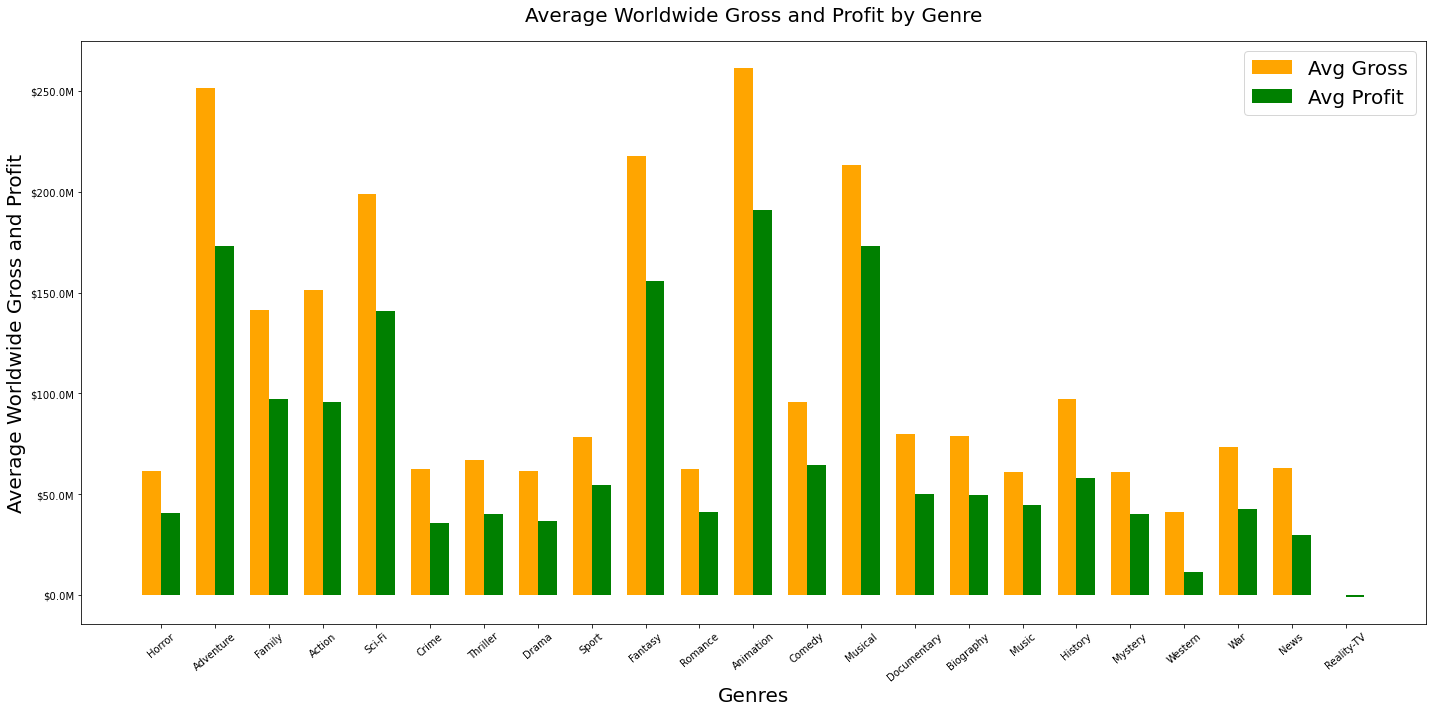

In [45]:
# Draw a double bar graph of the data
fig, ax = plt.subplots(figsize=(20,10))

labels = genre_dict_profit.keys()
width  = 0.35

x  = np.arange(len(labels))
y1 = genre_dict_gross.values()
y2 = genre_dict_profit.values()

rects1 = ax.bar(x- width/2, y1, width, color='orange', label='Avg Gross')
rects2 = ax.bar(x+ width/2, y2, width, color='green', label='Avg Profit')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.rc('xtick', labelsize=16) 
plt.xticks(rotation=40)
plt.rc('ytick', labelsize=20)

ax.set_xlabel('Genres', fontsize=20)
ax.set_ylabel('Average Worldwide Gross and Profit', fontsize=20)
ax.set_title('Average Worldwide Gross and Profit by Genre', pad=20, fontsize=20)
ax.legend(loc=1, prop={'size': 20})
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.show()

### Ordered Average Worldwide Gross by Genre

Diving a little deeper we explored the top grossing genres.

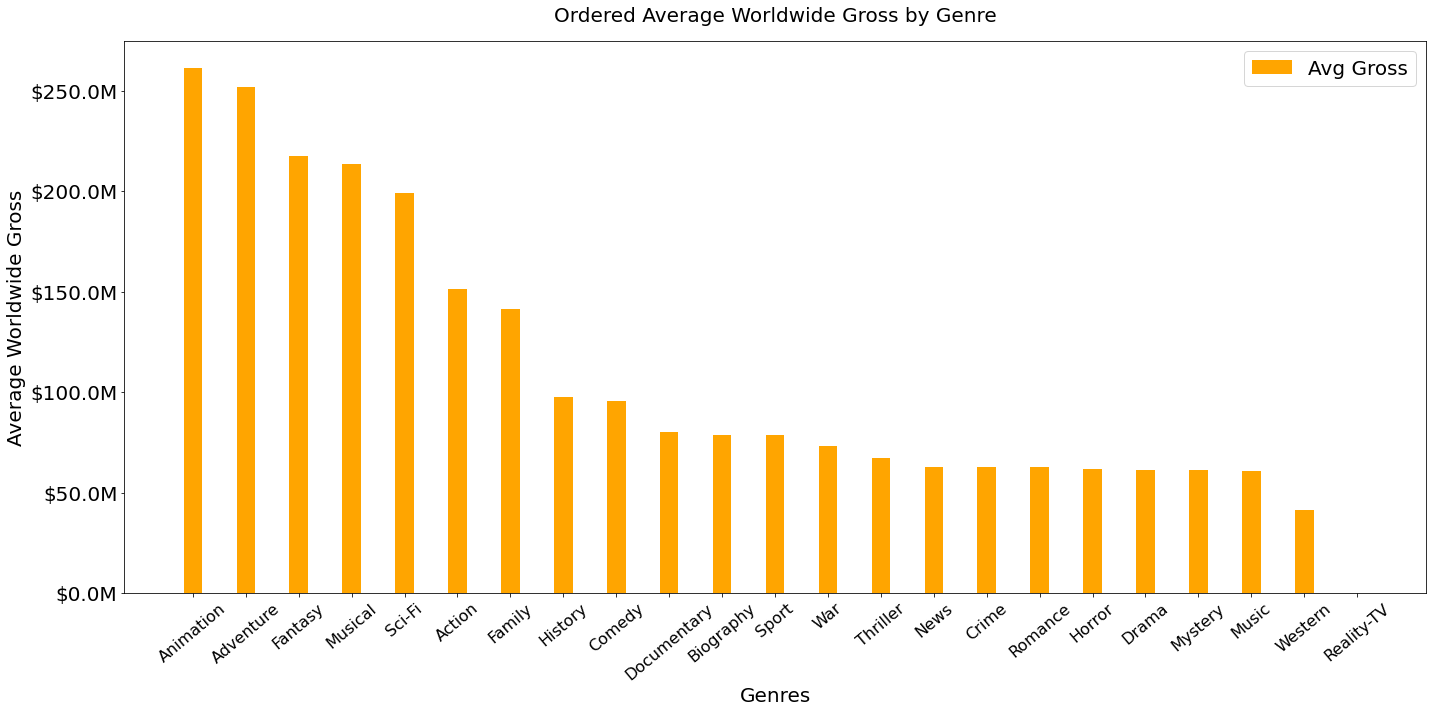

In [46]:
# Sort genre_dict_gross from highest to lowest
genre_dict_gross1 = OrderedDict(sorted(genre_dict_gross.items(), key=itemgetter(1), reverse=True))


# Draw a sorted bar graph of average gross per genre
fig, ax = plt.subplots(figsize=(20,10))

labels = genre_dict_gross1.keys()
width  = 0.35

x  = np.arange(len(labels))
y  = genre_dict_gross1.values()

ax.bar(x, y, width, color='orange', label='Avg Gross')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.rc('xtick', labelsize=16) 
plt.xticks(rotation=40)
plt.rc('ytick', labelsize=20)

ax.set_xlabel('Genres', fontsize=20)
ax.set_ylabel('Average Worldwide Gross', fontsize=20)
ax.set_title('Ordered Average Worldwide Gross by Genre', pad=20, fontsize=20)
ax.legend(loc=1, prop={'size': 20})
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.show()

### Ordered Average Profit by Genre

Finally we explored the most profitable generes and we can confidently recommend ones that would be more likely to result in higher profits.

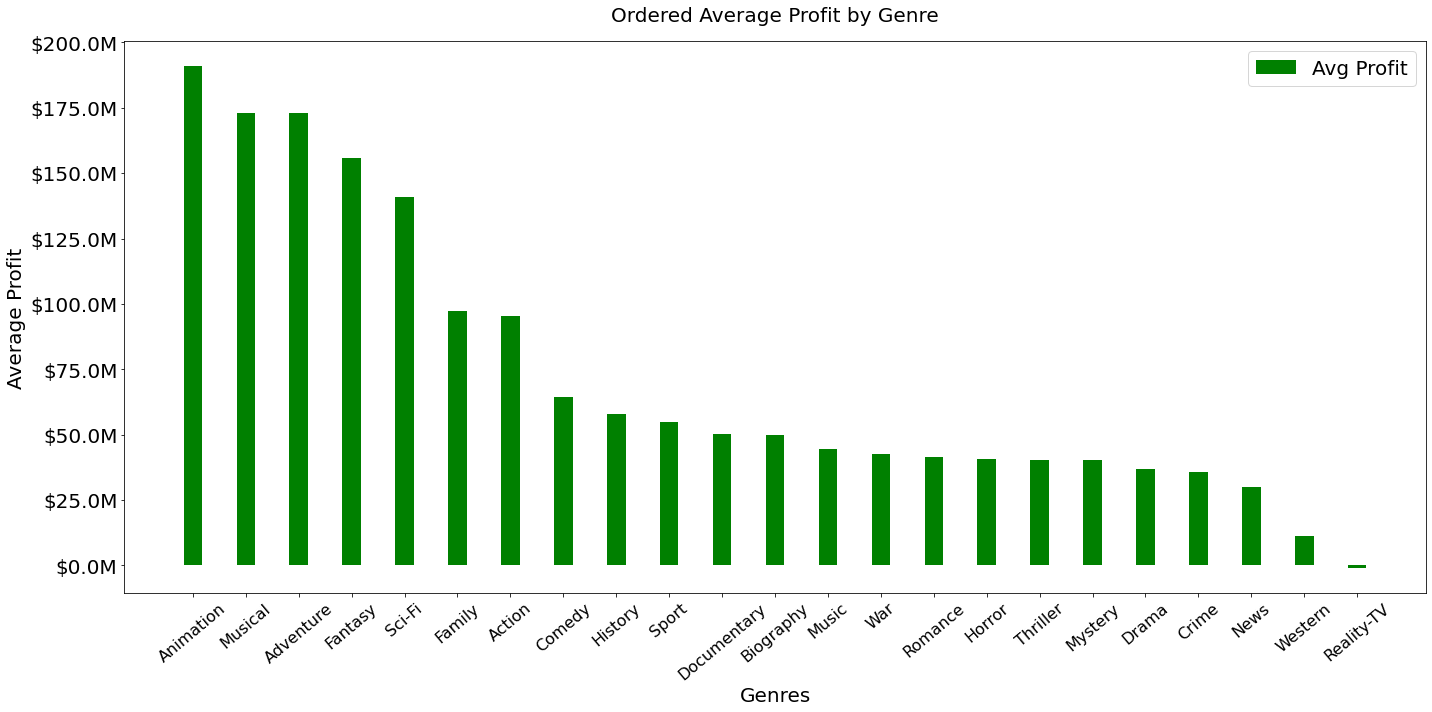

In [47]:
# Sort genre_dict_profit from highest to lowest
genre_dict_profit1 = OrderedDict(sorted(genre_dict_profit.items(), key=itemgetter(1), reverse=True))


# Draw a sorted bar graph of average profit per genre
fig, ax = plt.subplots(figsize=(20,10))

labels = genre_dict_profit1.keys()
width  = 0.35

x  = np.arange(len(labels))
y  = genre_dict_profit1.values()

ax.bar(x, y, width, color='green', label='Avg Profit')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.rc('xtick', labelsize=16) 
plt.xticks(rotation=40)
plt.rc('ytick', labelsize=20)

ax.set_xlabel('Genres', fontsize=20)
ax.set_ylabel('Average Profit', fontsize=20)
ax.set_title('Ordered Average Profit by Genre', pad=20, fontsize=20)
ax.legend(loc=1, prop={'size': 20})
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.show()

## Conclusion

Our analysis leads to these three recommendations:
- Invest more per movie by making fewer movies. Since Microsoft is just starting out in film production, they may be tempted to start with several lower budget movies. Our data suggests that is likely to be less profitable than a smaller number of higher budget movies.
- Use some combination of Animation, Musical, Adventure, and Fantasy genres. Many movies use genre combinations to diversify their target audience. We recommend focusing on the top four genres by profit.
- Start or obtain a franchise. Franchises are heavily represented amongst the highest profiting movies annually and overall. We recommend Microsoft either tap into an existing franchise, or build one from scratch. 


## Next Steps

- Identify which genre combinations are most profitable. There are numerous possible combinations that may define a movie, and further exploration into these combinations may be useful for fine-tuning.
- Look at what determines a franchise’s success. Our data showed that many of the most profitable movies have been franchises, but we were limited in determining the cause of that relationship. More analysis could reveal more about these successful franchises.
- Measure reviews against our findings. Our primary metric of popularity was profit, but an alternative would be to analyze which movies have the highest reviews. There may be a predictive relationship between profit and critical acclaim.